In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
NUM_CLASSES = 10
RESHAPED = 784
HIDDEN_NEURONS = 256
IMG_ROWS = 28
IMG_COLS = 28
BATCH_SIZE = 128
EPOCHS = 200
VALIDATION_SPLIT = 0.2

In [5]:
class cnn_fmnist:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential([
            Dense(HIDDEN_NEURONS, input_shape = input_shape, name='Dense_layer1', activation='relu'),
            Dense(HIDDEN_NEURONS, name='Dense_layer', activation='relu'),
            Dense(classes, name='output_layer', activation='softmax')
        ])
        return model

In [6]:
model = cnn_fmnist.build(input_shape=(RESHAPED,), classes=NUM_CLASSES)
model.summary()

C:\Users\miguelestradam36\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense_layer1 (Dense)            │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_layer (Dense)             │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
fashion_data = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

train_images = train_images.reshape((60000, RESHAPED))
test_images = test_images.reshape((10000, RESHAPED))

train_images, test_images = train_images/255.0 , test_images/255.0

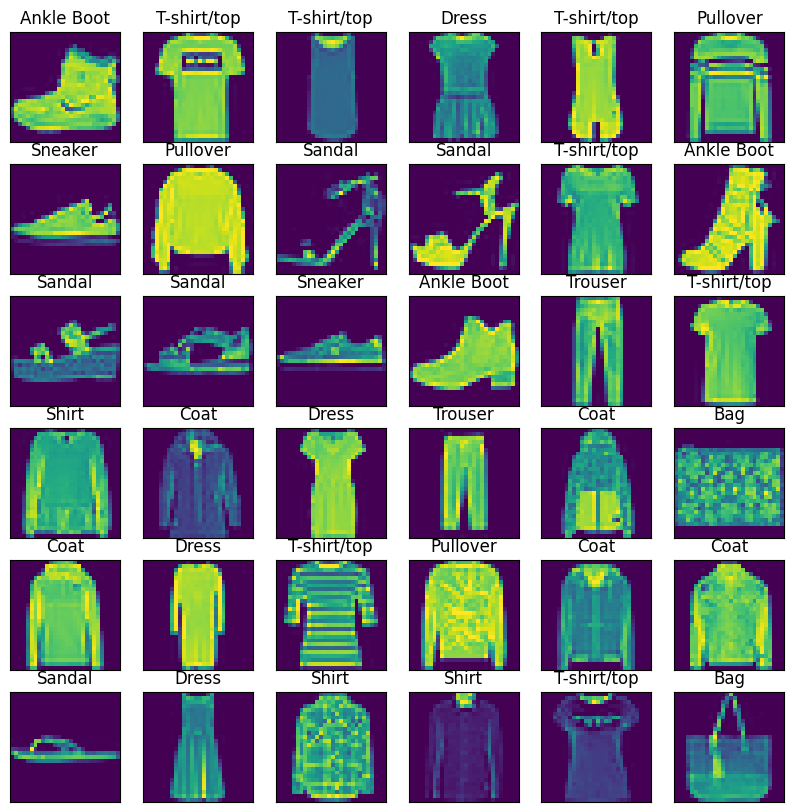

In [8]:
labels = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress',
          4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag',
          9:'Ankle Boot'}

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((IMG_ROWS, IMG_COLS)))
    label_index = train_labels[i]
    plt.title(labels[label_index])
plt.show()

In [9]:

train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [10]:
# Already tried other optimizers
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense_layer1 (Dense)            │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_layer (Dense)             │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7534 - loss: 0.7105 - val_accuracy: 0.8505 - val_loss: 0.4193
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8592 - loss: 0.3881 - val_accuracy: 0.8725 - val_loss: 0.3649
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8761 - loss: 0.3400 - val_accuracy: 0.8773 - val_loss: 0.3391
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8856 - loss: 0.3110 - val_accuracy: 0.8759 - val_loss: 0.3495
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8937 - loss: 0.2889 - val_accuracy: 0.8773 - val_loss: 0.3404
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8996 - loss: 0.2736 - val_accuracy: 0.8821 - val_loss: 0.3281
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9061 - loss: 0.2523 - val_accuracy: 0.8833 - val_loss: 0.3262
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9058 - loss: 0.2486 - val_accu

In [12]:
score = model.evaluate(test_images, test_labels)
print("Test score: {}".format(score[0]))
print("Test accuracy: {}".format(score[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8921 - loss: 1.2686
Test score: 1.2684085369110107
Test accuracy: 0.8899999856948853


Text(0.5, 1.0, 'Train - Accuracy')

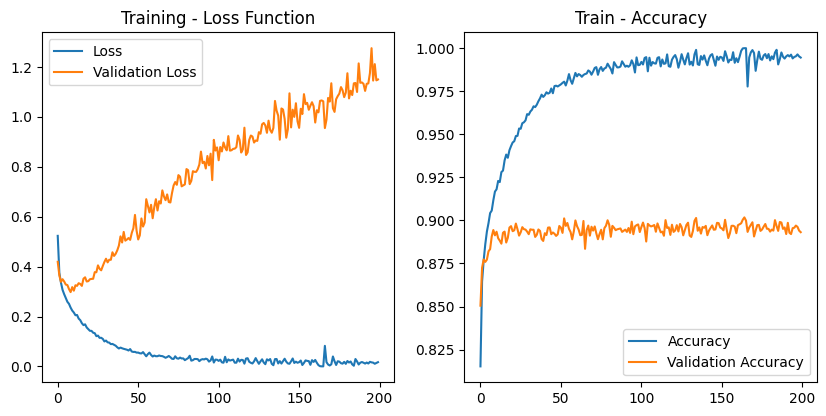

In [13]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [14]:
predicted_classes = np.around(model.predict(test_images))
predicted_classes = np.argmax(predicted_classes, axis=1)

test_labels = np.argmax(test_labels, axis=1)

correct = np.nonzero(predicted_classes == test_labels)[0]
incorrect = np.nonzero(predicted_classes != test_labels)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


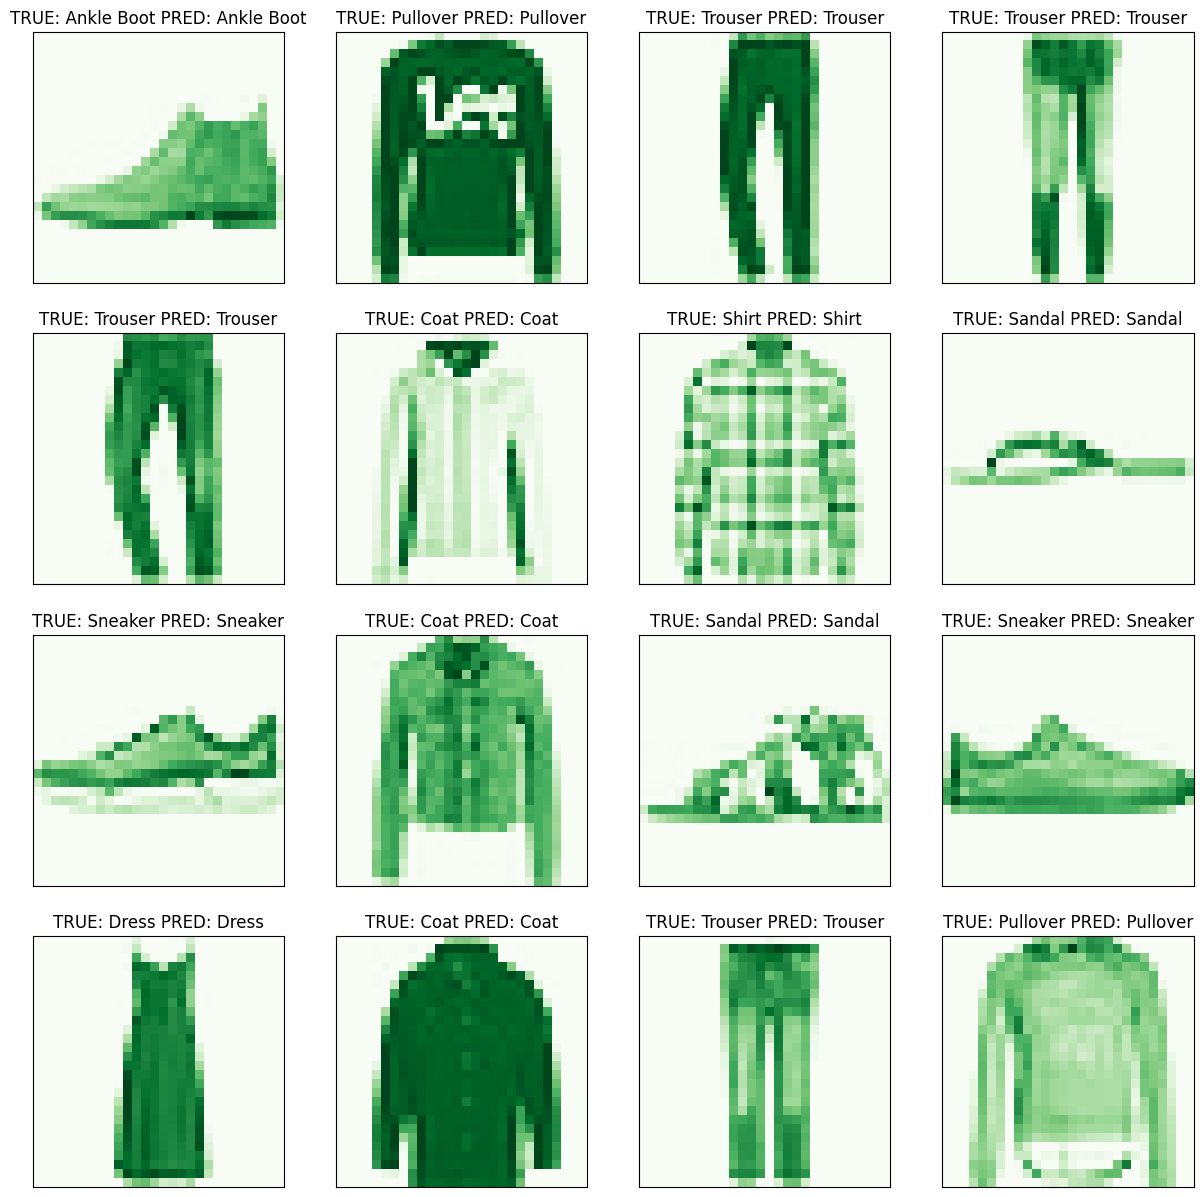

In [15]:
plt.figure(figsize=(15,15))

for i, index in enumerate(correct[:16]):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(test_images[index].reshape((IMG_ROWS, IMG_COLS)), cmap='Greens')
    label_index = test_labels[index]
    plt.title('TRUE: {} PRED: {}'.format(labels[test_labels[index]], labels[predicted_classes[index]]))

plt.show()